In [1]:
import trees

In [2]:
myDat,labels = trees.createDataSet()

In [3]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [4]:
labels

['no surfacing', 'flippers']

In [5]:
trees.calcShannonEnt(myDat)

0.9709505944546686

In [6]:
myDat[0][-1]='maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [7]:
trees.calcShannonEnt(myDat)

1.3709505944546687

In [8]:
myDat,labels=trees.createDataSet()
trees.splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [9]:
trees.splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [10]:
trees.chooseBestFeatureToSplit(myDat)

0

In [11]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [12]:
myDat,labels=trees.createDataSet()
myTree = trees.createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [13]:
import treePlotter
    
treePlotter.createPlot()

<Figure size 640x480 with 1 Axes>

In [14]:
def getNumLeafs(myTree):
    numLeafs = 0
    feature = list(myTree.keys())[0]
    subTree = myTree[feature]
    for key in subTree:
        if type(subTree[key]).__name__=='dict':
            numLeafs += getNumLeafs(subTree[key])
        else:
            numLeafs += 1
    return numLeafs

In [15]:
def getTreeDepth(myTree):
    if type(myTree).__name__!='dict':
        return 1
    feature = list(myTree.keys())[0]
    subTree = myTree[feature]
    maxDepth = 0
    for key in subTree:
        if type(subTree[key]).__name__=='dict':
            depth = getTreeDepth(subTree[key])
        else:
            depth = 0
        if maxDepth < depth: maxDepth = depth
    return maxDepth+1

In [16]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': \
    {0: 'no', 1: 'yes'}}}},
    {'no surfacing': {0: 'no', 1: {'flippers': \
    {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]

In [17]:
retrieveTree (1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [18]:
myTree = retrieveTree (0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [19]:
getNumLeafs(myTree)

3

In [20]:
getTreeDepth(myTree)

2

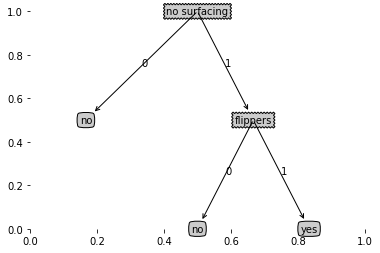

In [57]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.axl.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
    
import matplotlib.pyplot as plt


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] + cntrPt[0]) / 2
    yMid = (parentPt[1] + cntrPt[1]) / 2
    createPlot.axl.text(xMid, yMid, txtString)
def plotNodeAndText(nodeTxt, centerPt, parentPt, nodeType, txtString):
    plotNode(nodeTxt, centerPt, parentPt, nodeType)
    plotMidText(centerPt, parentPt, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    feature = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotNodeAndText(feature, cntrPt, parentPt, treePlotter.decisionNode, nodeTxt)
    secondDict = myTree[feature]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNodeAndText(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, treePlotter.leafNode, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    #axprops = dict(xticks=[], yticks=[])
    #createPlot.axl = plt.subplot(111, frameon=False, **axprops)
    createPlot.axl = plt.subplot(111, frameon=False)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0   # 总高度是1，depth是3，所以每一层的y分别是1， 0.5， 0
    plotTree(inTree, (0.5, 1.0), '')   # root的parent就是root node上，所以第一点看不见箭头
    plt.show()
    
myTree=retrieveTree (0)
createPlot(myTree)

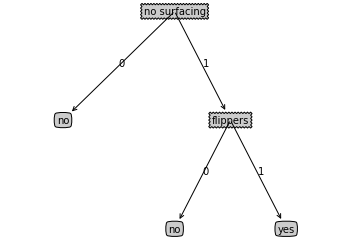

In [49]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.axl.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
    
import matplotlib.pyplot as plt


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] + cntrPt[0]) / 2
    yMid = (parentPt[1] + cntrPt[1]) / 2
    createPlot.axl.text(xMid, yMid, txtString)
def plotNodeAndText(nodeTxt, centerPt, parentPt, nodeType, txtString):
    plotNode(nodeTxt, centerPt, parentPt, nodeType)
    plotMidText(centerPt, parentPt, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    #plotNodeAndText(firstStr, cntrPt, parentPt, treePlotter.decisionNode, nodeTxt)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, treePlotter.decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, treePlotter.leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
            #plotNodeAndText(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, treePlotter.leafNode, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.axl = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()
    
myTree=retrieveTree (0)
createPlot(myTree)